In [1]:
import numpy as np
import pandas as pd
import sys, glob
import os
import warnings
from datetime import date
import pickle
import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import Image

sys.path.append(os.path.expanduser("~")+'/CEUAS/CEUAS/public/cds-backend/code/')
sys.path.append(os.path.expanduser("~")+'/uvpy/')
sys.path.append(os.getcwd()+'/../resort/rasotools-master/')
import cds_eua4 as eua
import rasotools
import uvfunctions as uvf
import uvplot as uvp
import uvtests as uvt

warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (20, 10)
font = {'size'   : 20}
matplotlib.rc('font', **font)


no config found


# Trends in temperature

In [2]:
sys.path.append(os.getcwd()+'/../resort/rasotools-master/')
import rasotools
def show_trend_map(file,label, c_bar, multiplier = 1, c_bar_red_top = True):
    plev = file.split('_')[-5]
    sdate = file.split('_')[-4]
    edate = file.split('_')[-3]
    good_results = {}
    good_results['lat'] = []
    good_results['lon'] = []
    good_results['st'] = []
    good_results['at'] = []
    good_results['label'] = []
    
    if c_bar_red_top:
        cs = 'RdBu_r'
    else:
        cs = 'RdBu'
    
    results = pickle.load(open(file, 'rb'))
    for i in results:
        badflag = 0
        for j in i:
            try:
                if np.isnan(j):
                    badflag = 1
            except:
                pass
        if badflag == 0:
            good_results['lat'].append(i[1])
            good_results['lon'].append(i[2])
            good_results['st'].append(i[3][0])
            good_results['at'].append(i[4][0])
            good_results['label'].append(i[0].split('/')[-1].split('_')[0])
    da = pd.DataFrame.from_dict(good_results)
    statnum = len(da)

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da.st))
    cost = np.sum(a)/len(a)
    fig1 = uvp.world_map_mpl(da.lat, da.lon, da['st'], label + ' trend unadjusted \n '+str(plev)+'_'+sdate+'_'+edate+' \n heterogeneity cost: ' + str(cost), inp_vmin=-2, inp_vmax=2, invert_cbar=True, cbar_label = c_bar)

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da['at']))
    cost = np.sum(a)/len(a)
    fig1 = uvp.world_map_mpl(da.lat, da.lon, da['at'], label + ' trend adjusted \n '+str(plev)+'_'+sdate+'_'+edate+' \n heterogeneity cost: ' + str(cost), inp_vmin=-2, inp_vmax=2, invert_cbar=True, cbar_label = c_bar)


In [3]:
import pickle
sys.path.append(os.getcwd()+'/../resort/rasotools-master/')
import rasotools
def show_trend_diff_map(file,label, c_bar, multiplier = 1, c_bar_red_top = True):
    print(file)
    plev = file.split('_')[-5]
    sdate = file.split('_')[-4]
    edate = file.split('_')[-3]
    good_results = {}
    good_results['lat'] = []
    good_results['lon'] = []
    good_results['st'] = []
    good_results['at'] = []
    good_results['label'] = []
    
    if c_bar_red_top:
        cs = 'RdBu_r'
    else:
        cs = 'RdBu'
    
    results = pickle.load(open(file, 'rb'))
    for i in results:
        badflag = 0
        for j in i:
            try:
                if np.isnan(j):
                    badflag = 1
            except:
                pass
        if badflag == 0:
            good_results['lat'].append(i[1])
            good_results['lon'].append(i[2])
            good_results['st'].append(i[3][0])
            good_results['at'].append(i[4][0])
            good_results['label'].append(i[0].split('/')[-1].split('_')[0])
    da = pd.DataFrame.from_dict(good_results)
    da['diff'] = da['at'] - da['st']
    statnum = len(da)

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da['diff']))
    cost = np.sum(a)/len(a)
    fig1 = uvp.world_map_mpl(da.lat, da.lon, da['diff'], label + ' trend adjusted - unadjusted \n '+str(plev)+'_'+sdate+'_'+edate+' \n heterogeneity cost: ' + str(cost), inp_vmin=-5, inp_vmax=5, invert_cbar=True)
    # img = fig1.to_image(format="png")
    # display(Image(img) )


['/users/staff/uvoggenberger/scratch/CUON_trends/polyfit_trends_wd_700hPa_1940-01-01_1959-12-31_Trend_20240422.p', '/users/staff/uvoggenberger/scratch/CUON_trends/polyfit_trends_wd_700hPa_1993-01-01_2022-12-31_Trend_20240422.p', '/users/staff/uvoggenberger/scratch/CUON_trends/polyfit_trends_wd_700hPa_1973-01-01_2002-12-31_Trend_20240422.p', '/users/staff/uvoggenberger/scratch/CUON_trends/polyfit_trends_wd_700hPa_1958-01-01_1987-12-31_Trend_20240422.p']


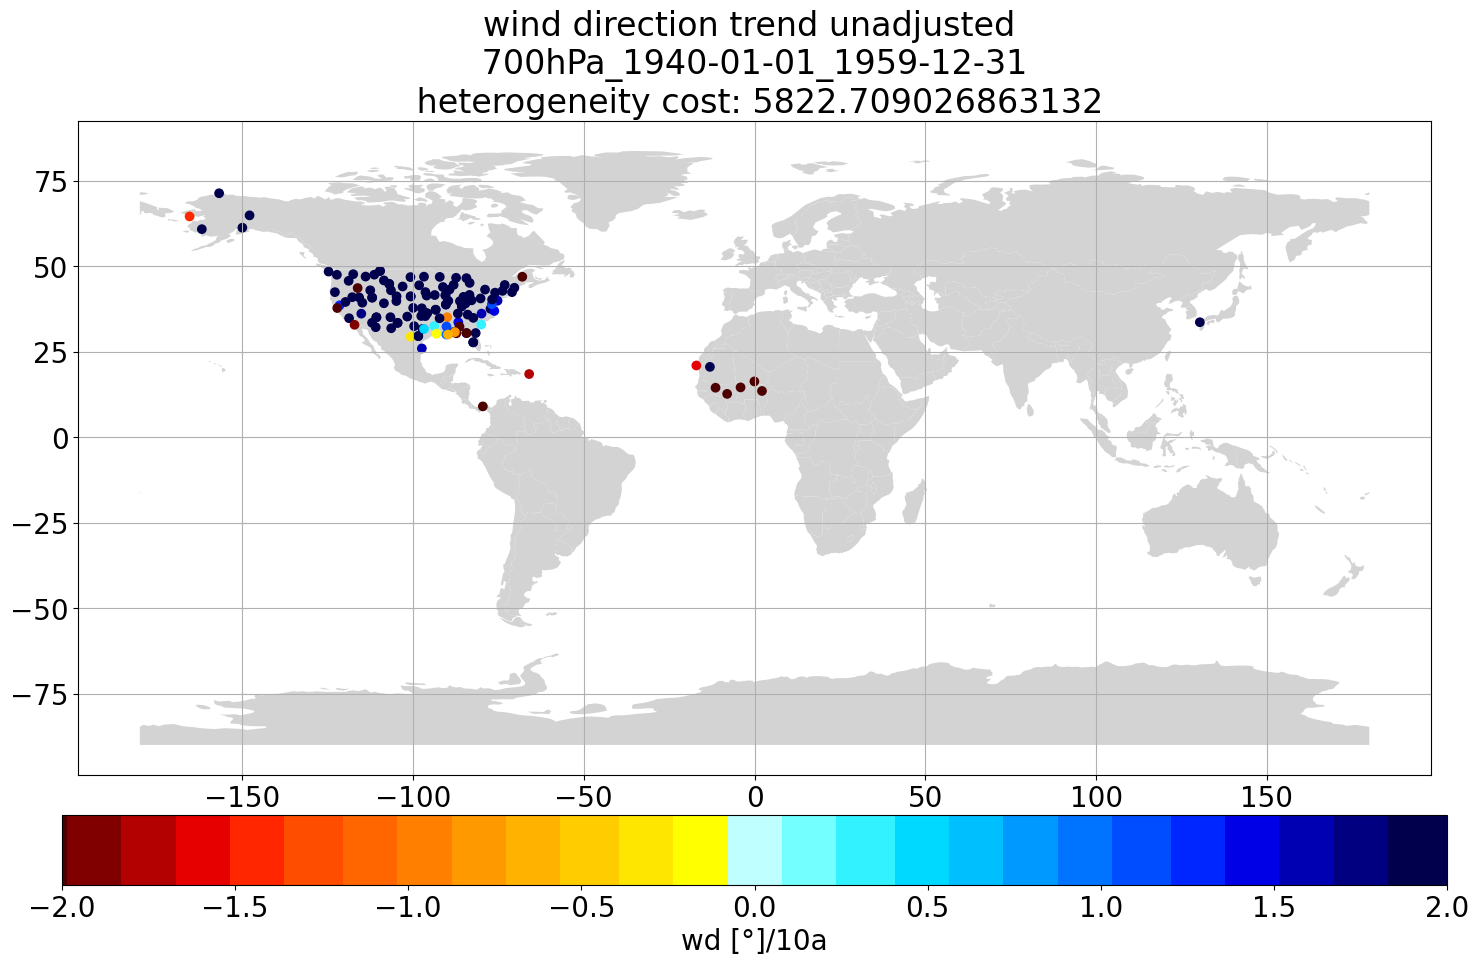

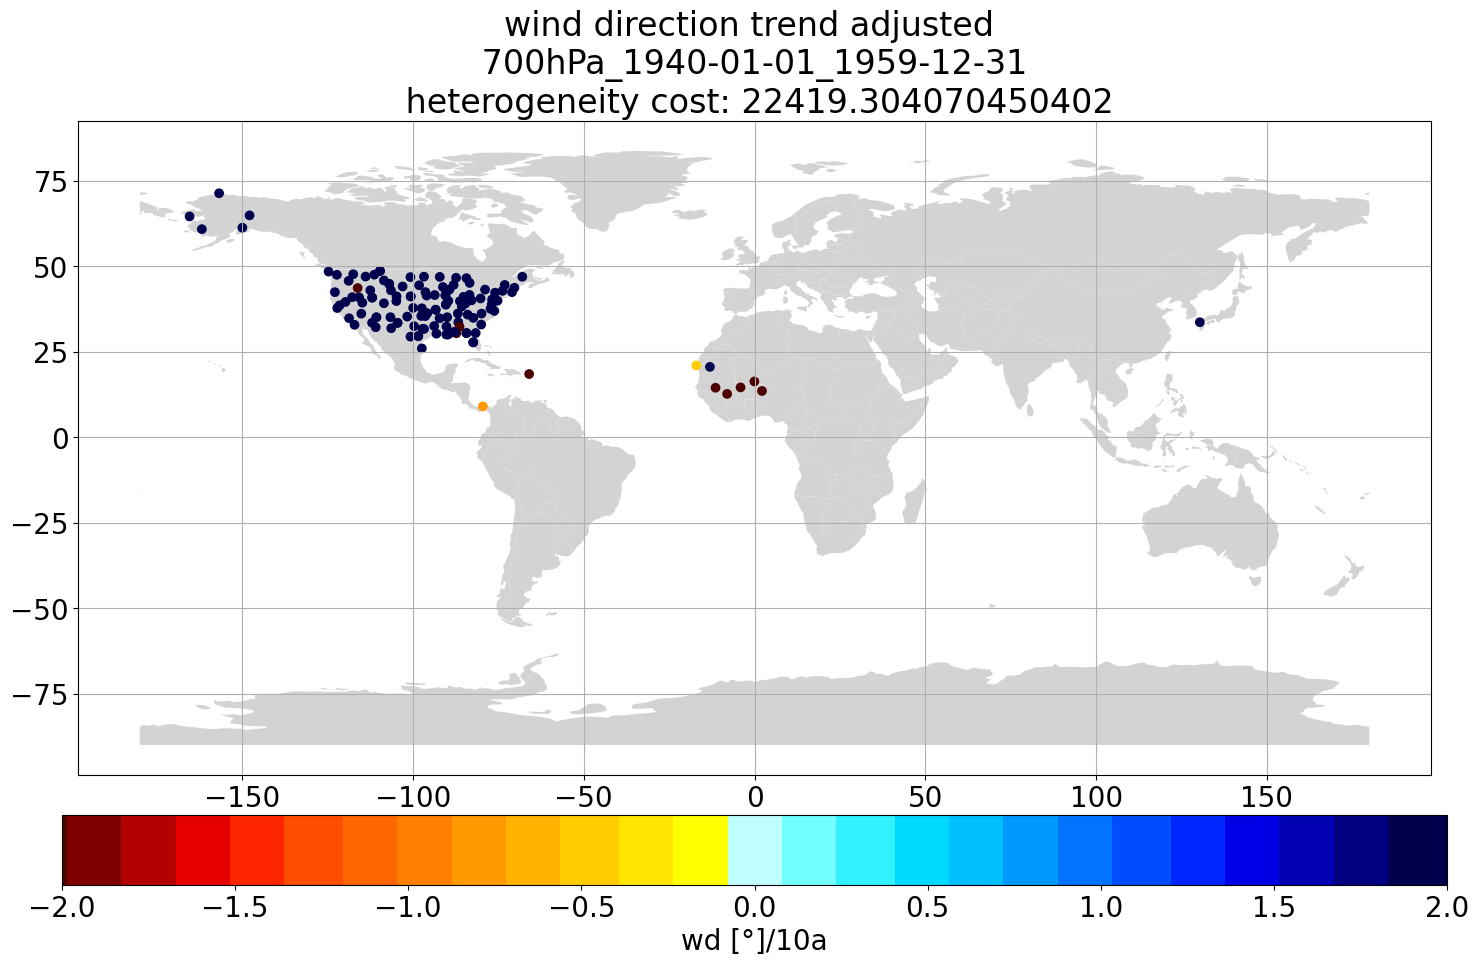

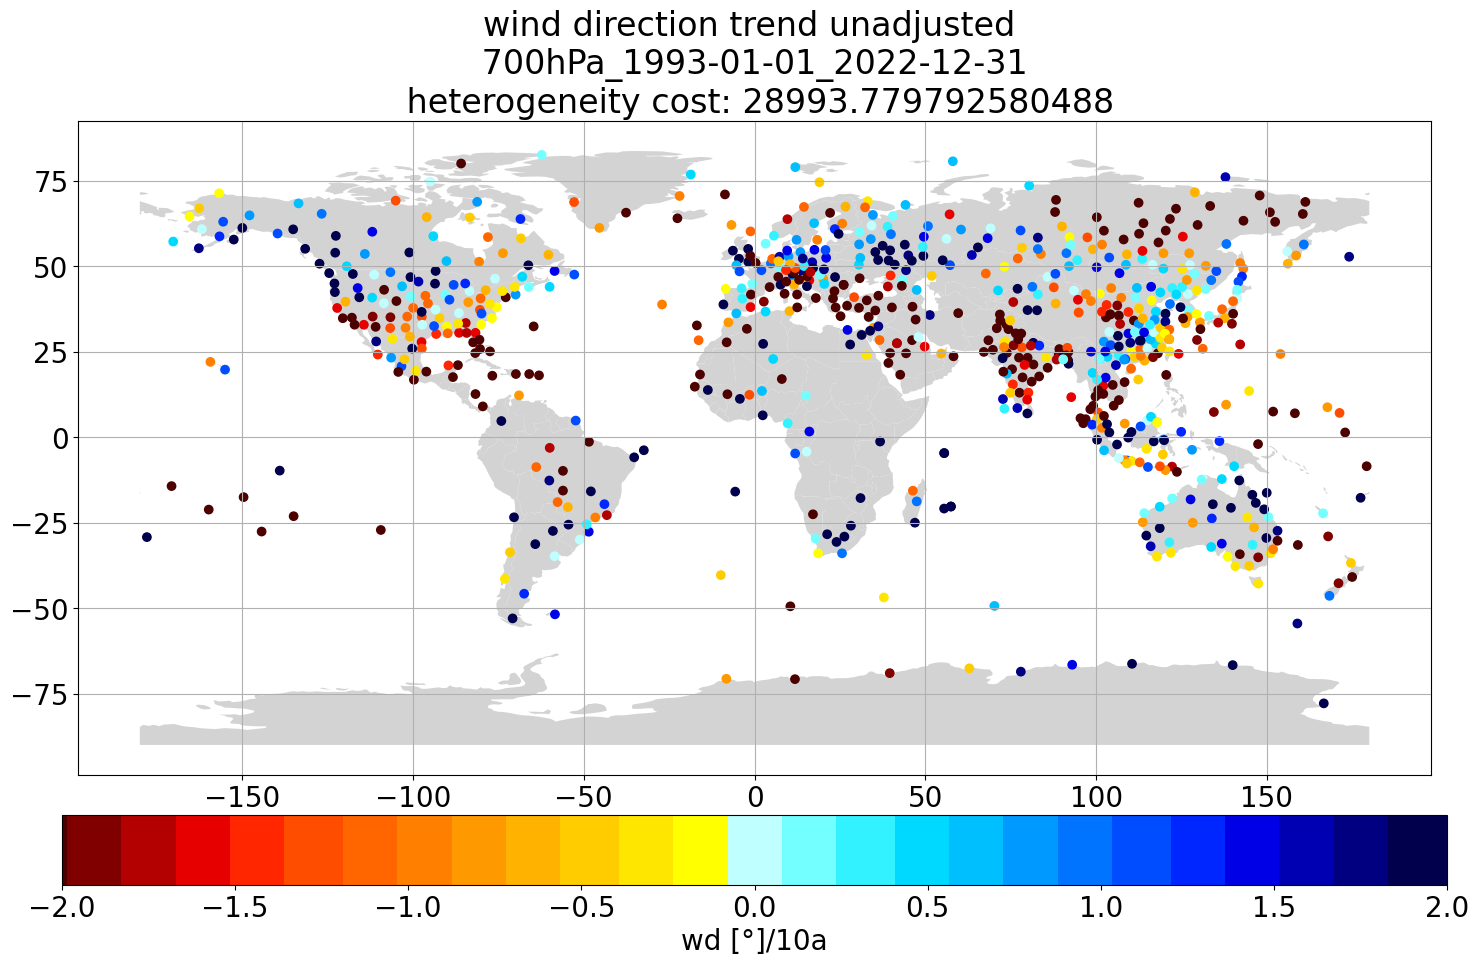

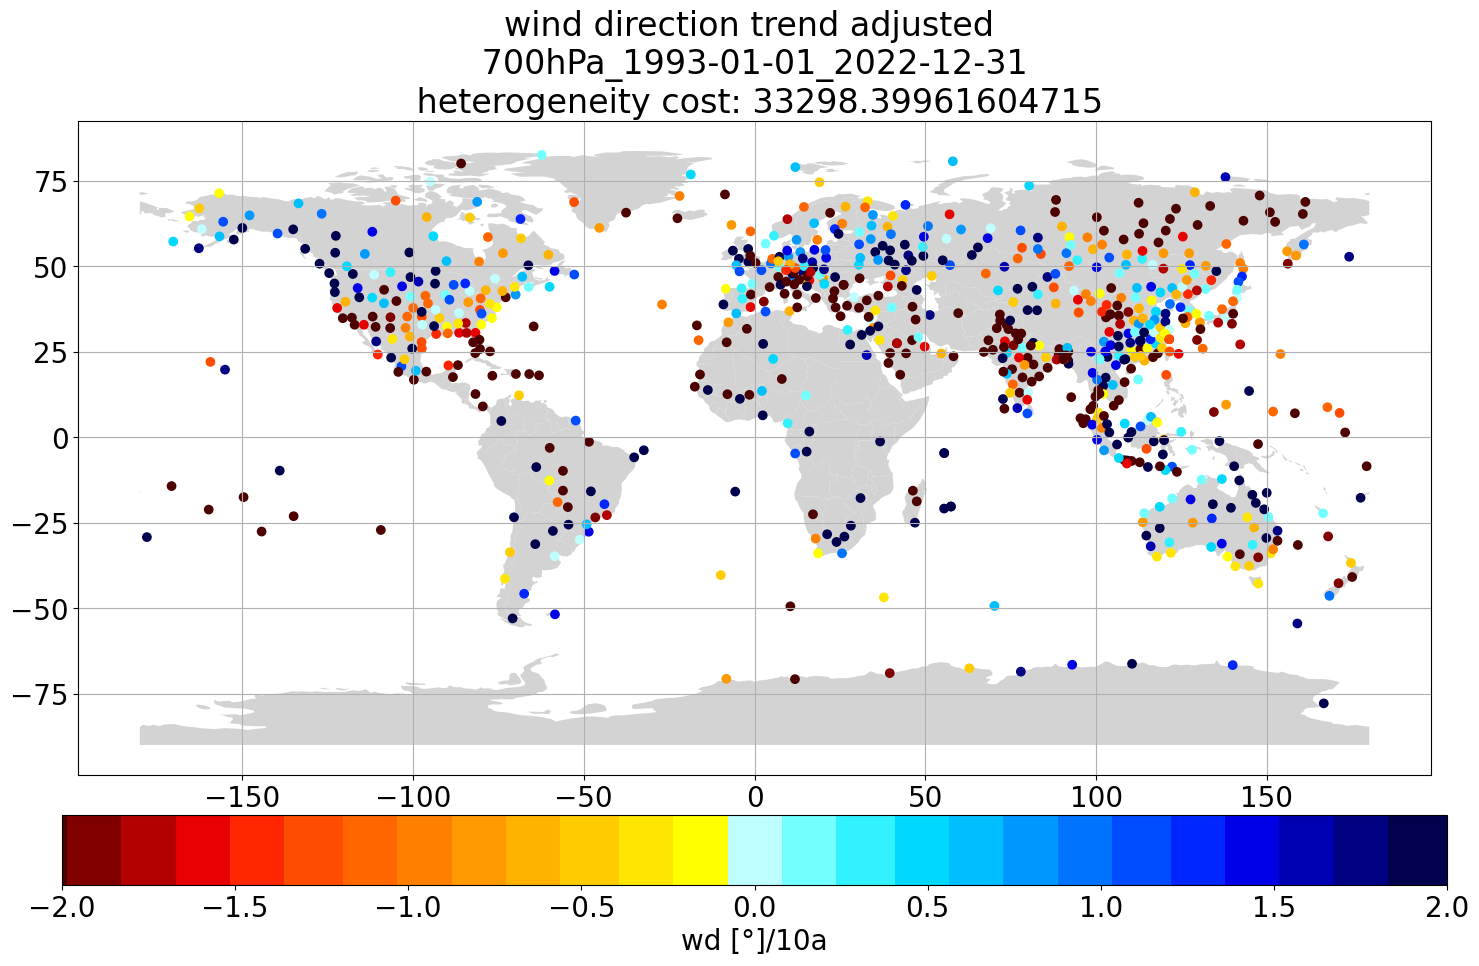

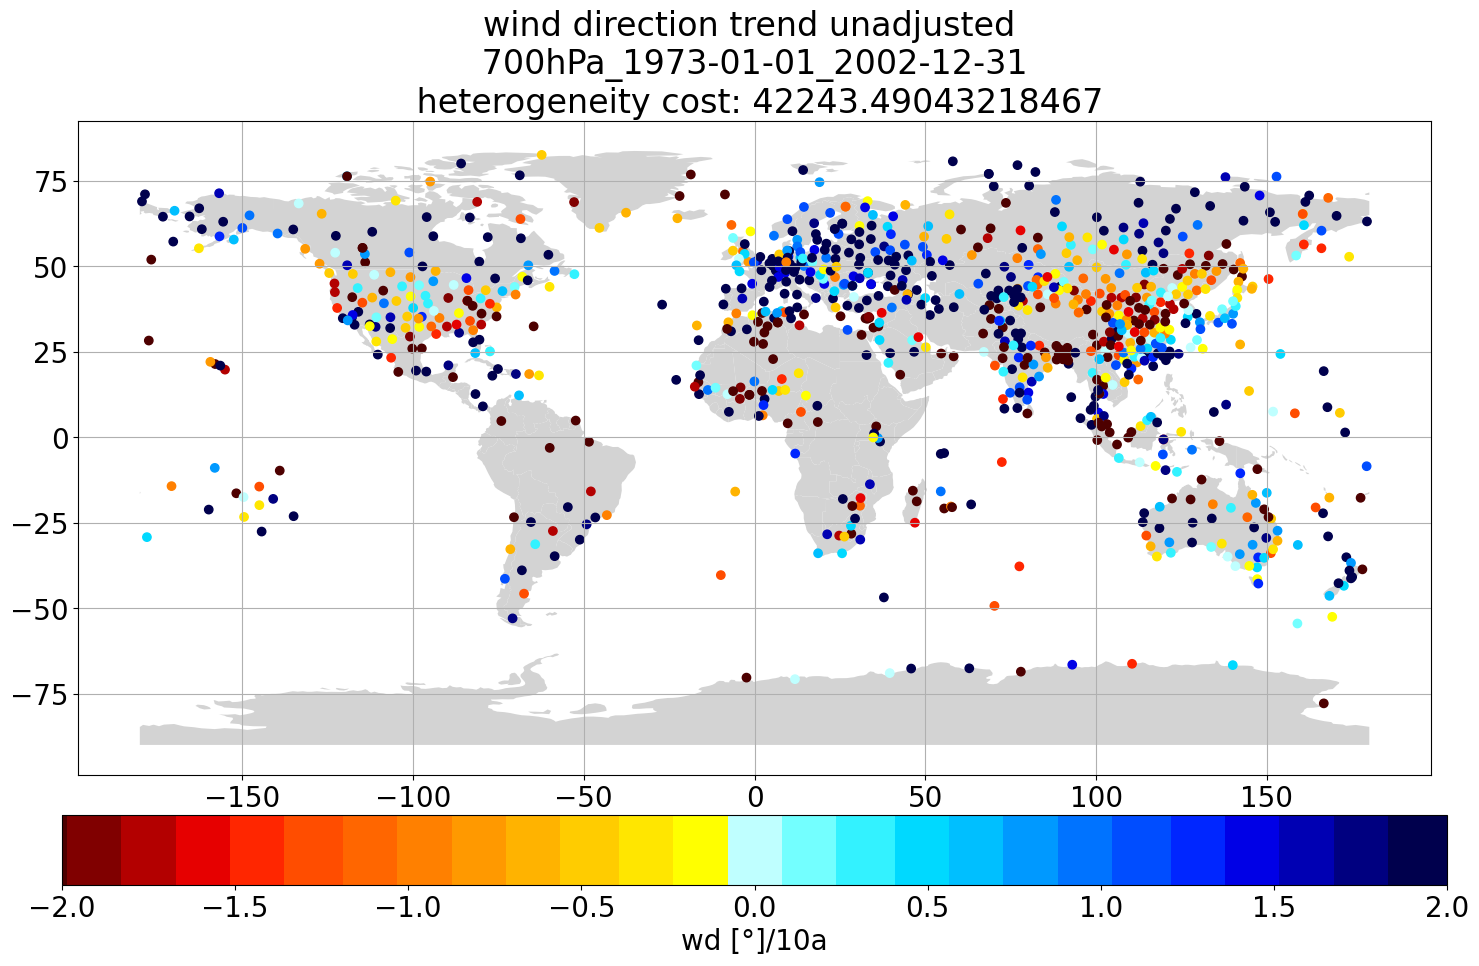

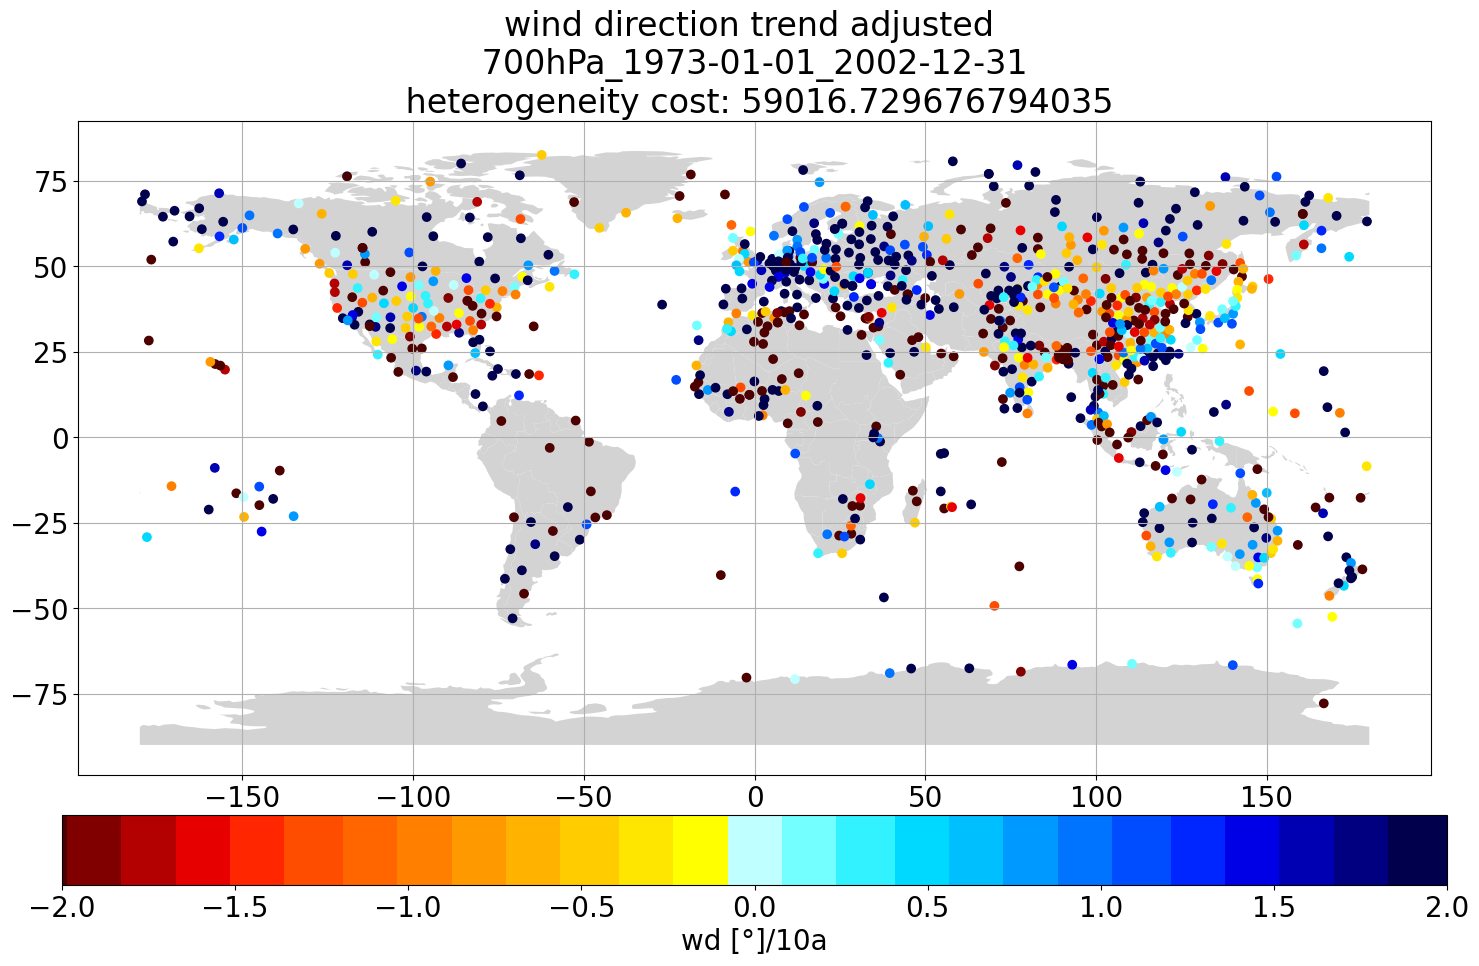

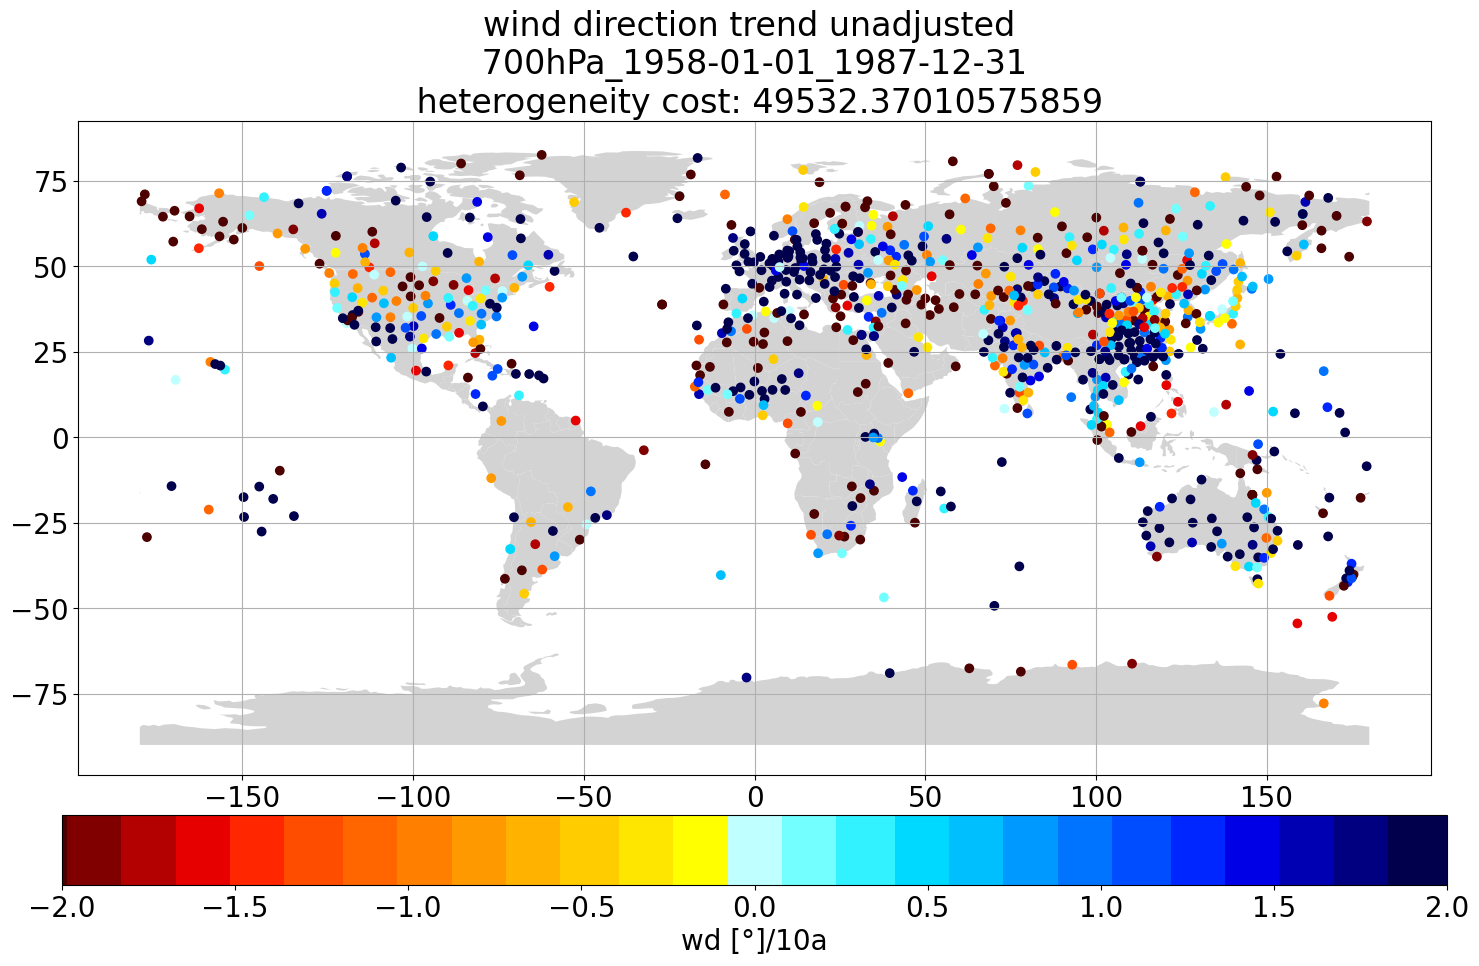

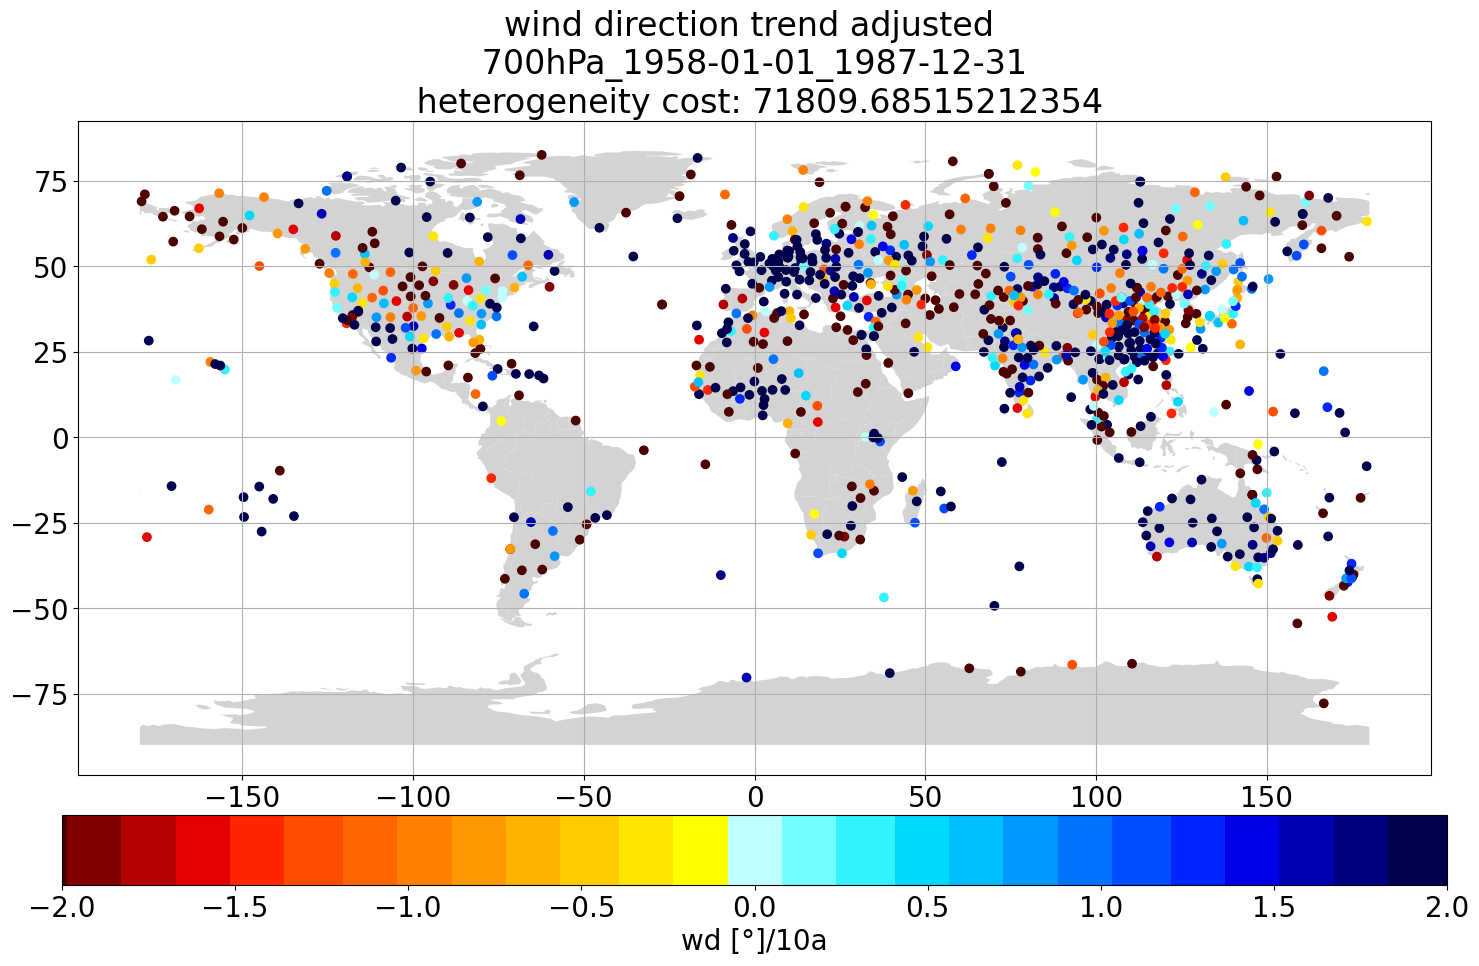

In [4]:
files = glob.glob('/users/staff/uvoggenberger/scratch/CUON_trends/polyfit_trends_wd*20240422.p')
print(files)
label = 'wind direction'
c_bar = 'wd [°]/10a'
for i in files:
    show_trend_map(i, label, c_bar, c_bar_red_top=True)